In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
# n = 50
# np.random.seed(1)
# y = np.array([1]*n + [2]*n + [3]*n + [1]*n) 
# N = len(y)
# X1 = np.linspace(1, N, N)
# f = interp1d(X1, y, kind='quadratic')
# X = np.linspace(1, N, 1*N)
# y = f(X)
# y = y + 0.25*np.random.rand(len(y))
# X = X.reshape(-1,1)

In [25]:
np.random.rand()

0.5392124485058827

In [741]:
np.random.seed(42)
y_clean = np.load('y_data.npy')
X_orig = np.linspace(1, len(y_clean), len(y_clean)).reshape(-1,1)/len(y_clean)
y_clean_downsampled = y_clean[::4]
y = y_clean_downsampled + 0.5*(np.random.rand(len(y_clean_downsampled)) - 0.5)
X = np.linspace(1, len(y), len(y)).reshape(-1,1)/len(y)

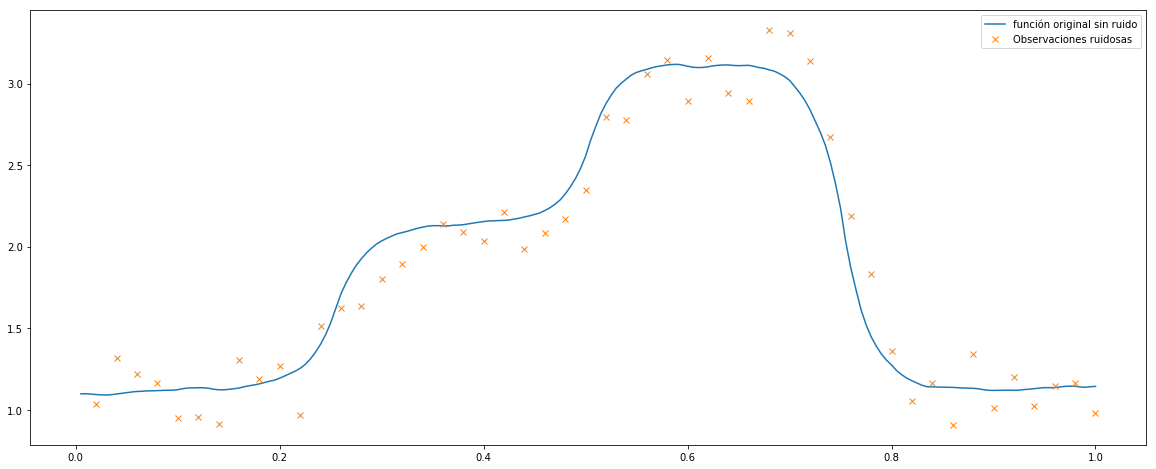

In [742]:
plt.figure(figsize=(20, 8))
plt.plot(X_orig, y_clean, label='función original sin ruido')
plt.plot(X, y, marker='x', linestyle = 'None', label='Observaciones ruidosas')
plt.legend()

In [743]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Decision Tree sin restricciones

In [744]:
dt_reg = DecisionTreeRegressor(random_state=1)

In [745]:
dt_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [746]:
y_pred = dt_reg.predict(X_orig)

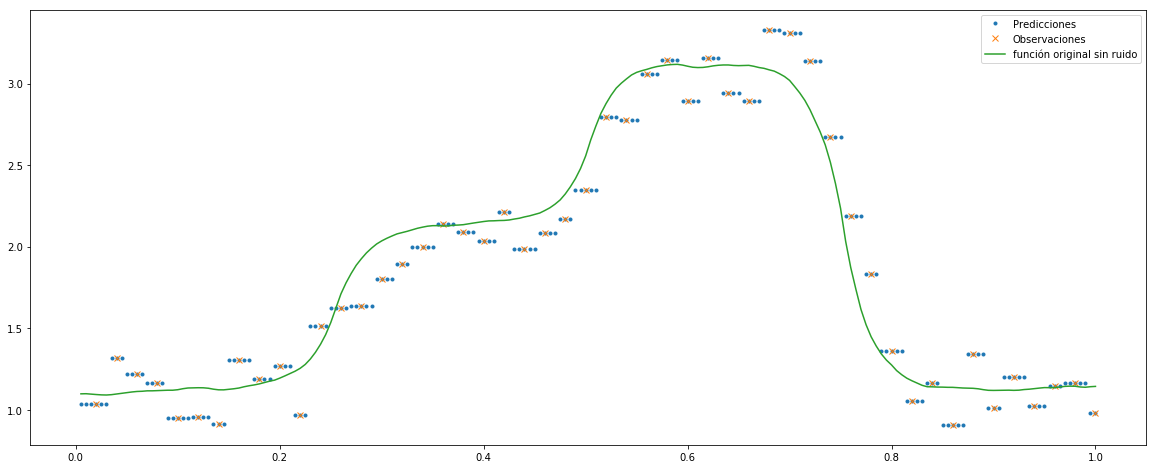

In [747]:
plt.figure(figsize=(20, 8))
plt.plot(X_orig, y_pred, label='Predicciones', marker='.', linestyle = 'None')
plt.plot(X, y, label='Observaciones', marker='x', linestyle = 'None',)
plt.plot(X_orig, y_clean, label='función original sin ruido')
plt.legend()

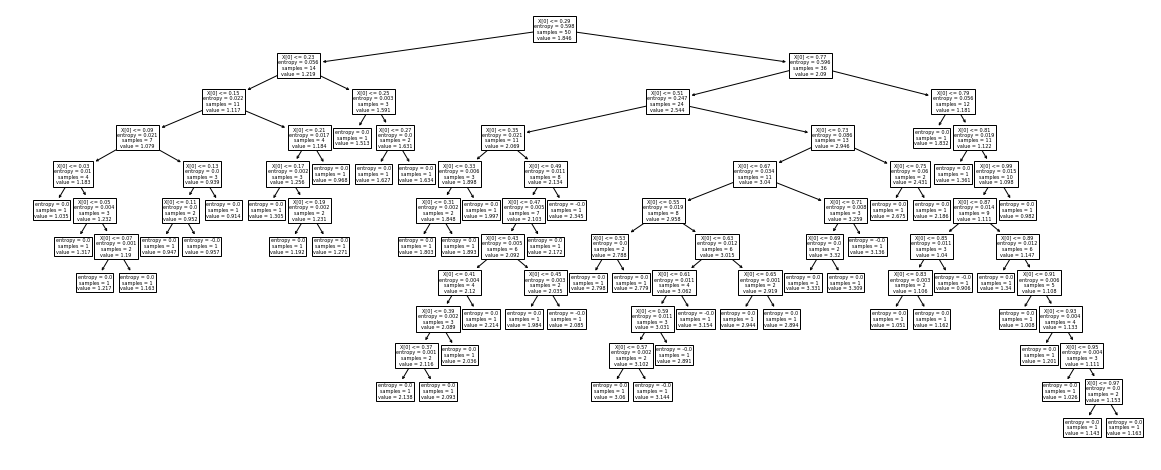

In [748]:
plt.figure(figsize=(20,8))
_= plot_tree(dt_reg)

In [749]:
dt_reg.get_n_leaves()

50

# Stump

In [750]:
stump_reg = DecisionTreeRegressor(random_state=1, max_depth=1)

In [751]:
stump_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [752]:
y_pred_stump = stump_reg.predict(X)

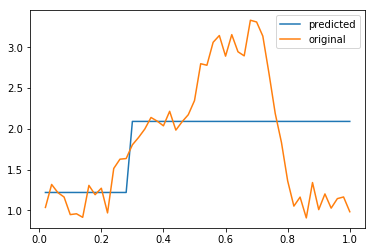

In [753]:
plt.plot(X, y_pred_stump, label='predicted')
plt.plot(X, y, label='original')
plt.legend()

# Bagging

In [754]:
from sklearn.ensemble import BaggingRegressor

In [755]:
bagg_reg = BaggingRegressor(DecisionTreeRegressor(random_state=1, criterion='mse'), n_estimators=20000, 
                             max_samples=0.5, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, random_state=1)

bagg_reg.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0

In [756]:
y_pred_bagg = bagg_reg.predict(X_orig)

In [757]:
# MSE Bagging
MSE_bagging = ((y_pred_bagg - y_clean)**2).sum()/len(y_pred_bagg)

In [758]:
# MSE Decision Tree
MSE_DT = ((y_pred - y_clean)**2).sum()/len(y_pred_bagg)

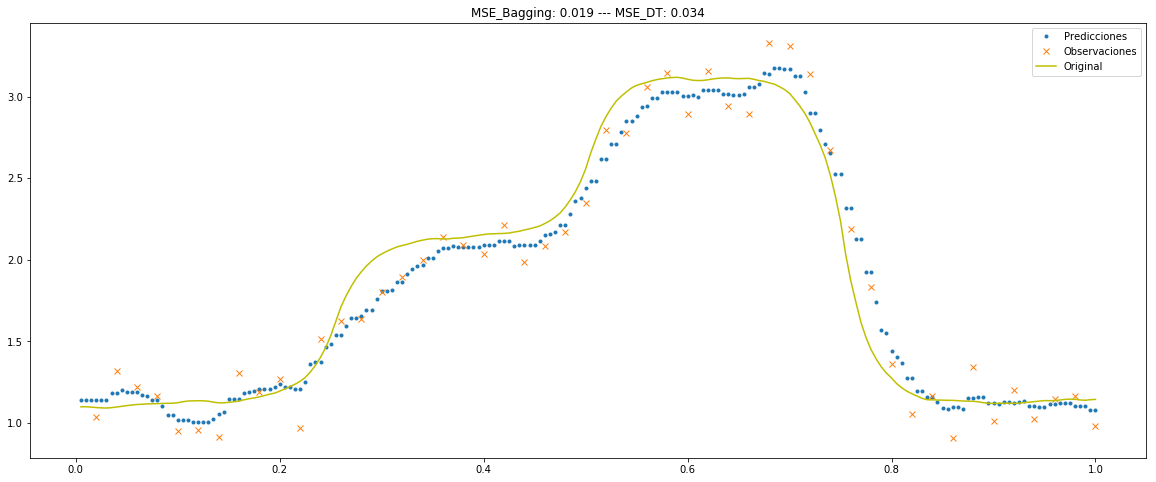

In [767]:
plt.figure(figsize=(20,8))
#plt.plot(X, y, label='Observaciones', c='r')
plt.plot(X_orig, y_pred_bagg, label='Predicciones', marker='.', linestyle = 'None')
plt.plot(X, y, label='Observaciones', marker='x', linestyle = 'None',)
plt.plot(X_orig, y_clean, label='Original', c='y')
plt.title(f'MSE_Bagging: {MSE_bagging:.3f} --- MSE_DT: {MSE_DT:.3f}' )
plt.legend()

# Estimadores en el bagging

In [577]:
bagg_reg.estimators_[:3]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1028862084, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=870353631, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_w

In [800]:
X_bs = X[np.sort(bagg_reg.estimators_samples_[i])]

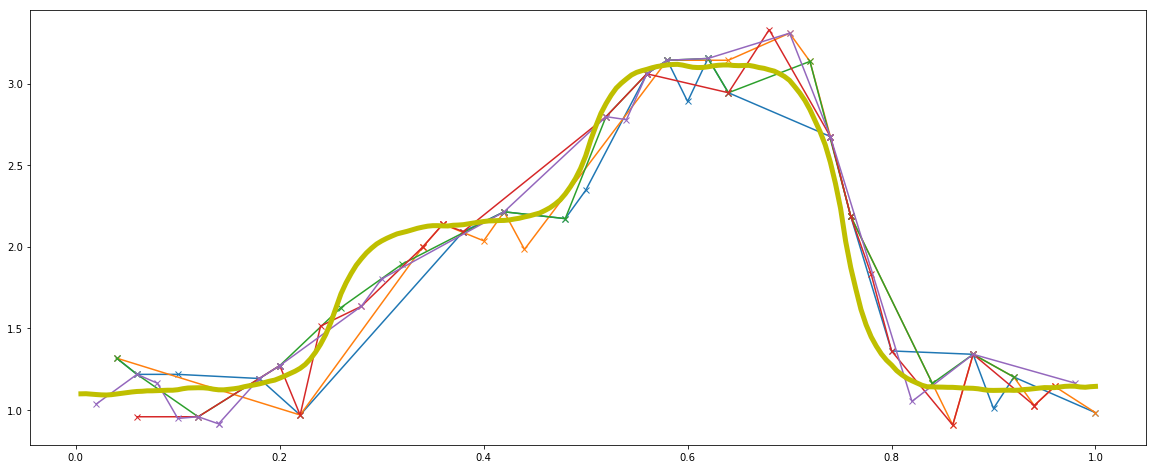

In [810]:
plt.figure(figsize=(20,8))
for i, DT_predictor in enumerate(bagg_reg.estimators_[:5]):
    X_bs = X[np.sort(bagg_reg.estimators_samples_[i])]
    y_pred_one_model = DT_predictor.predict(X_bs)
    
    plt.plot(X_bs, y_pred_one_model, label='Observaciones', marker='x',)
    # plt.plot(, y_pred_one_model, marker='.')
plt.plot(X_orig, y_clean, label='Original', c='y', lw=5)

# Gradient Boosting

In [811]:
from sklearn.ensemble import GradientBoostingRegressor

In [908]:
n_estimators = 50
boost_reg = GradientBoostingRegressor(n_estimators=n_estimators, subsample=1.0, max_depth=1, learning_rate=0.5)

In [909]:
boost_reg.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [910]:
y_boost = boost_reg.predict(X)

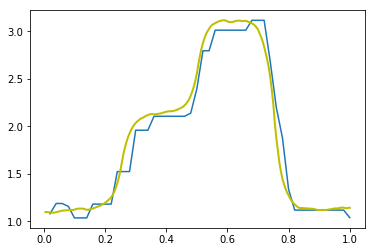

In [911]:
plt.plot(X, y_boost)
plt.plot(X_orig, y_clean, label='Original', c='y', lw=2)

In [912]:
# R^2
boost_reg.score(X, y)

0.9832657140026397

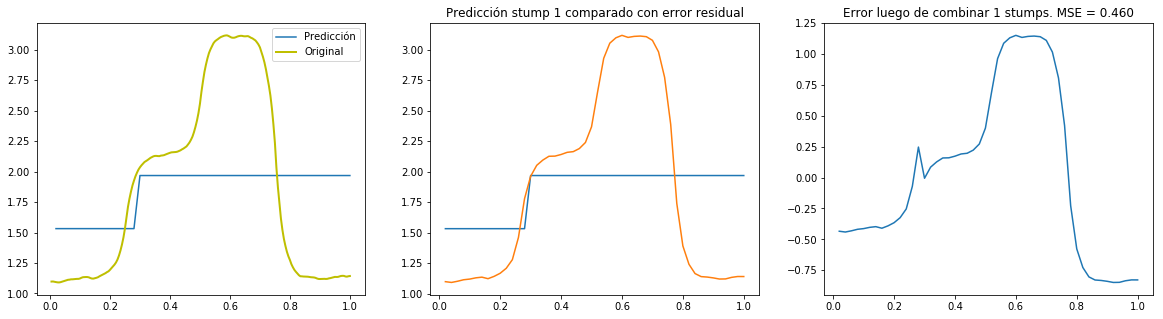

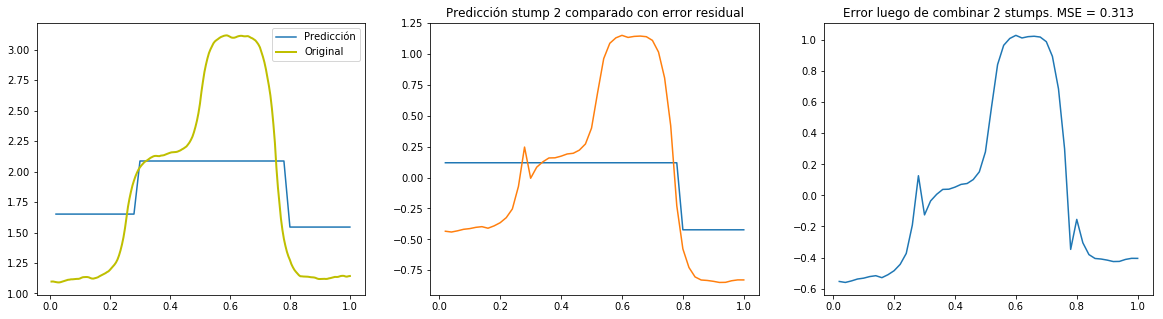

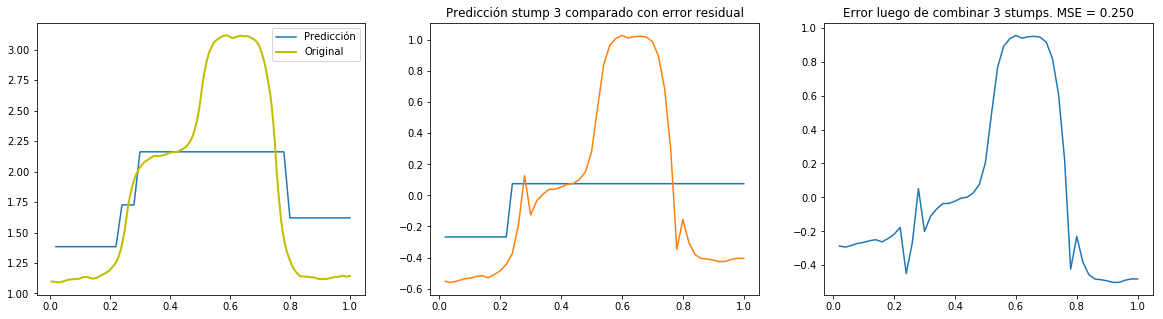

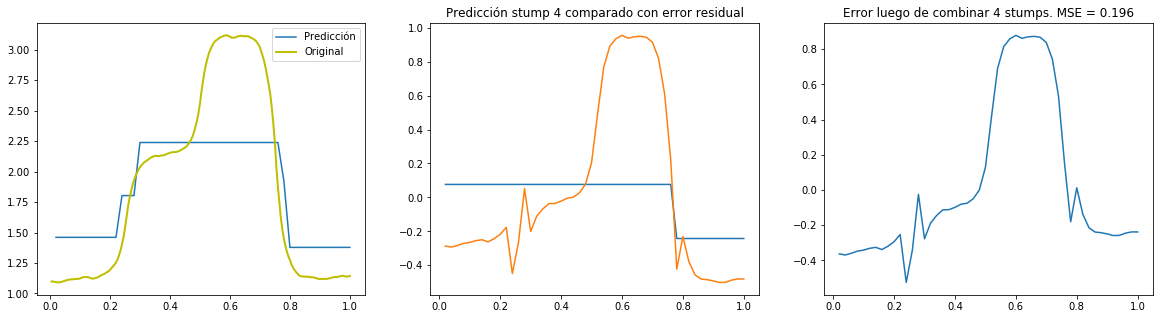

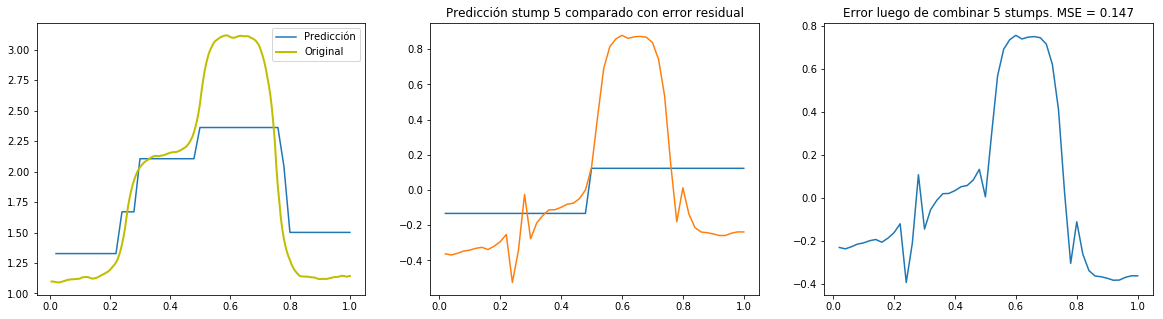

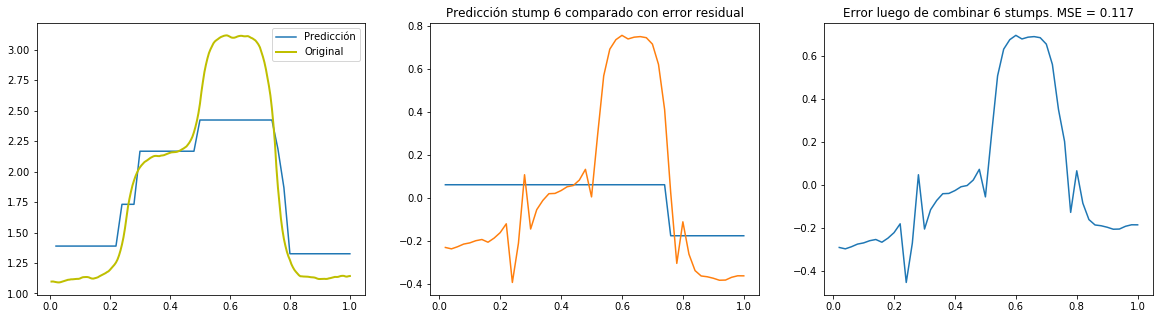

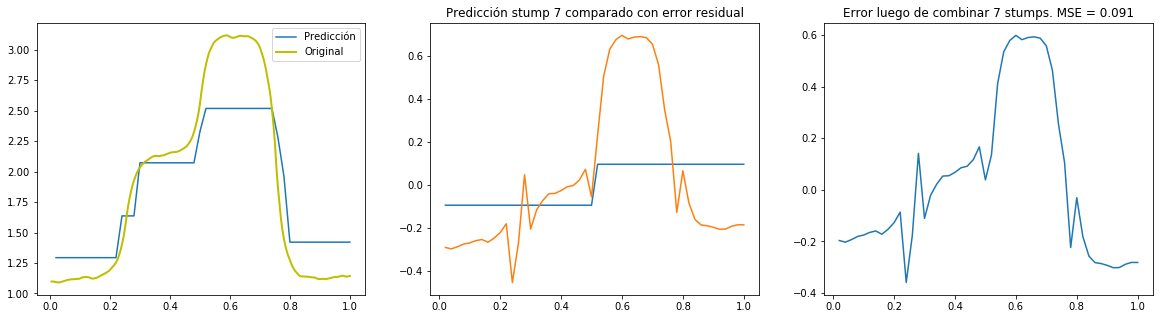

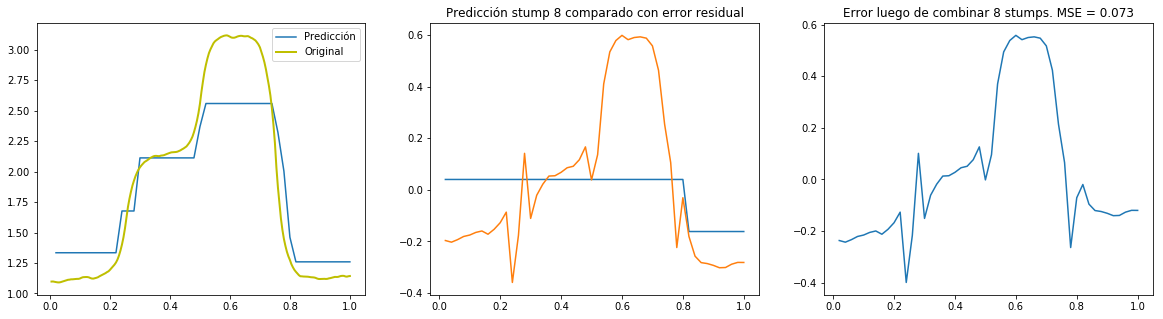

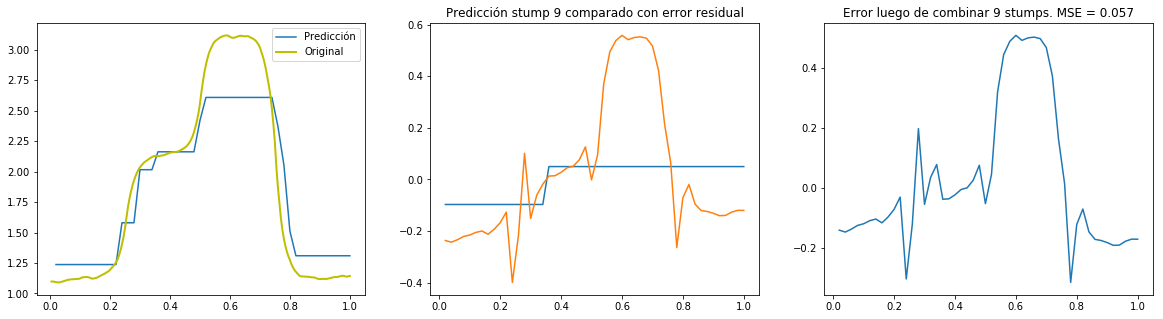

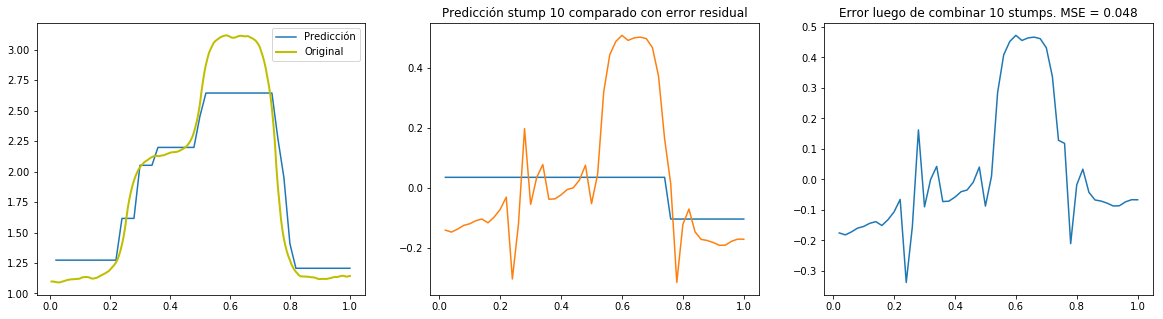

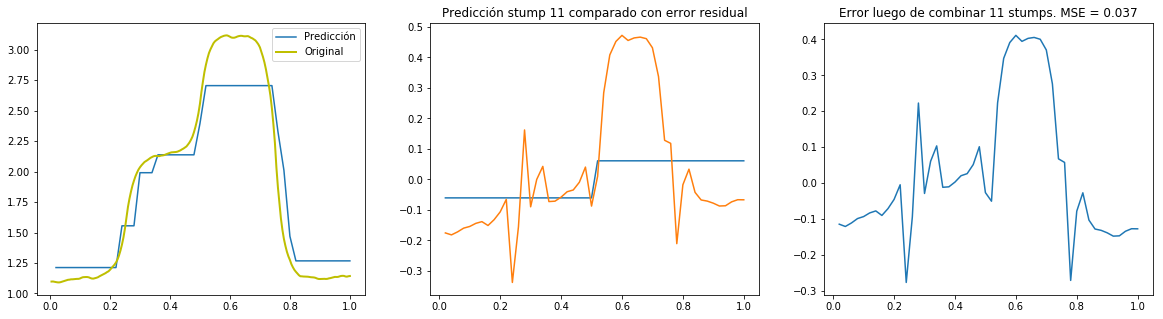

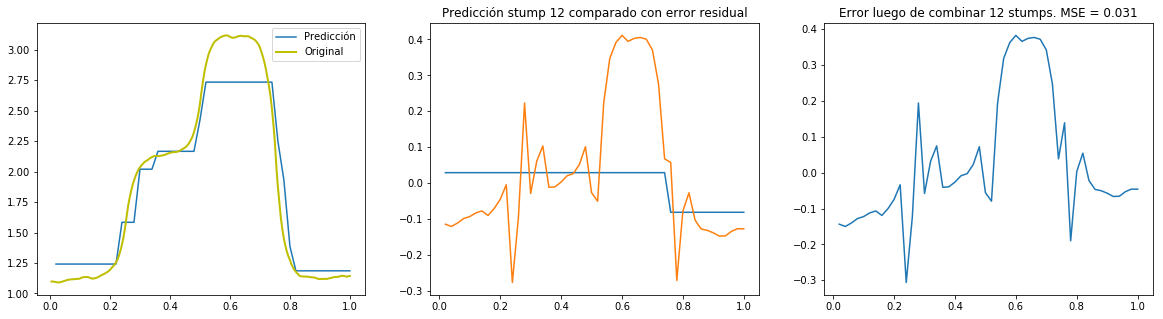

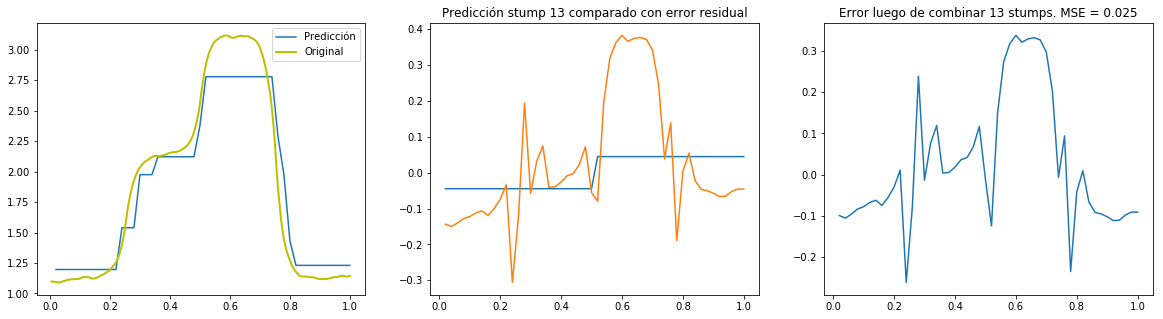

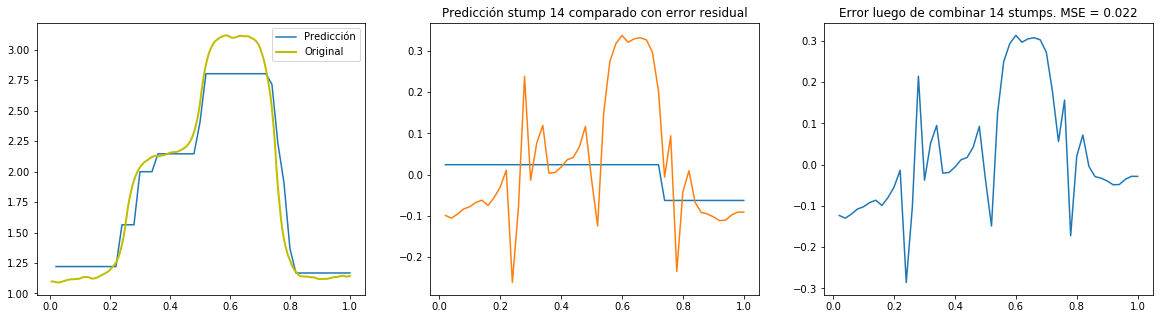

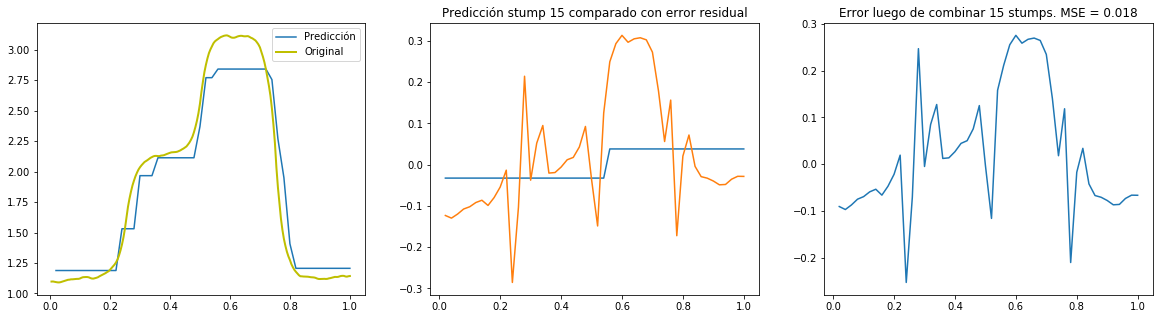

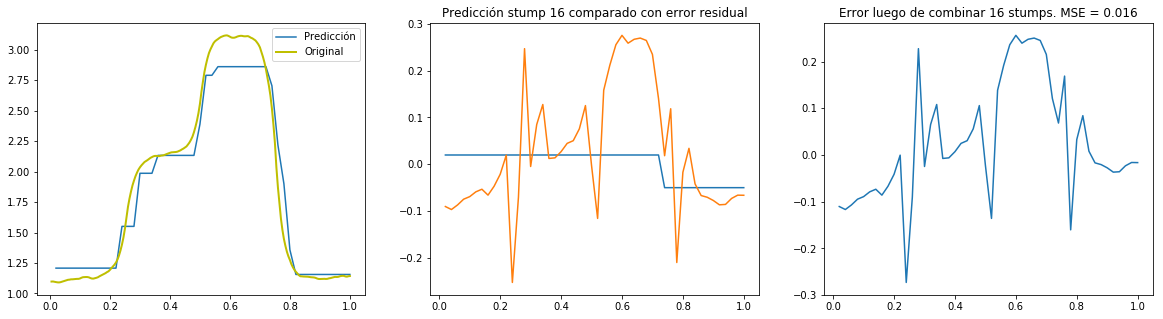

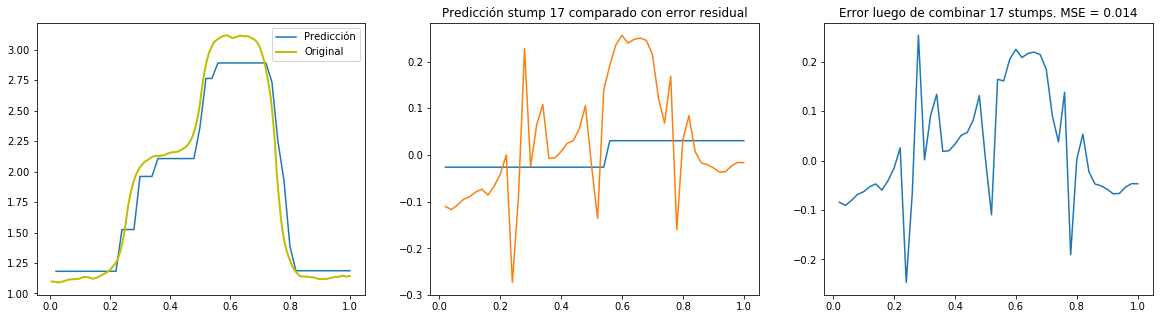

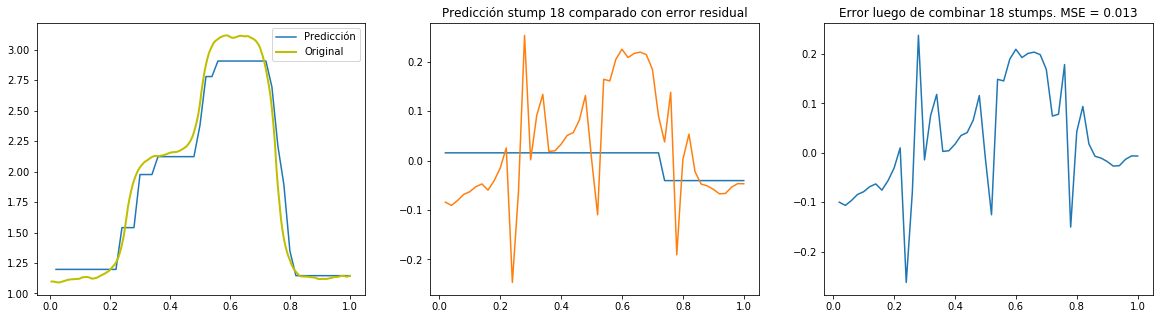

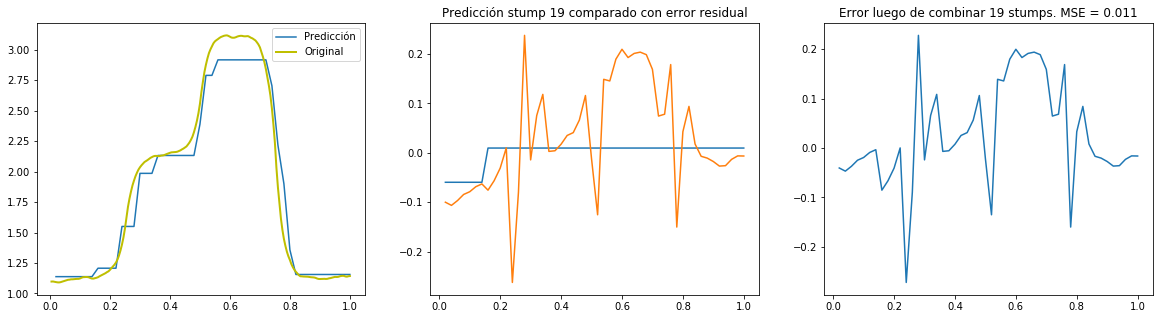

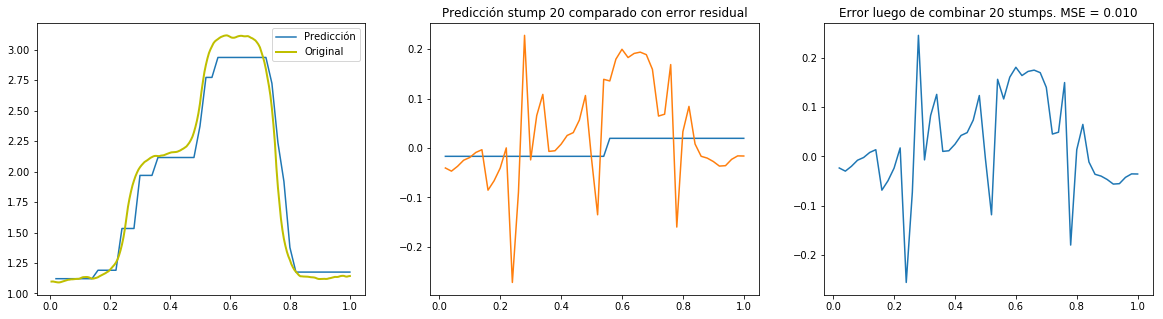

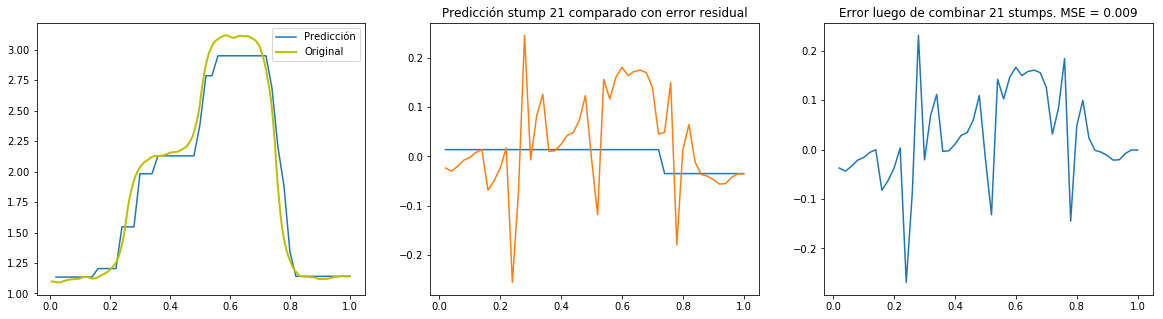

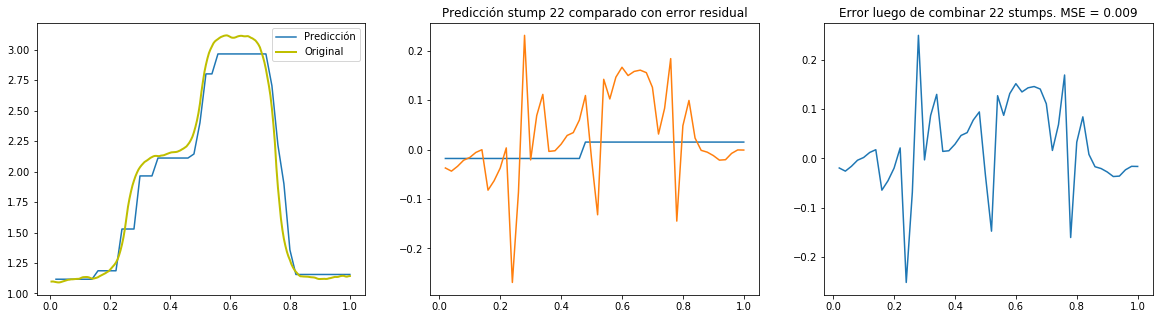

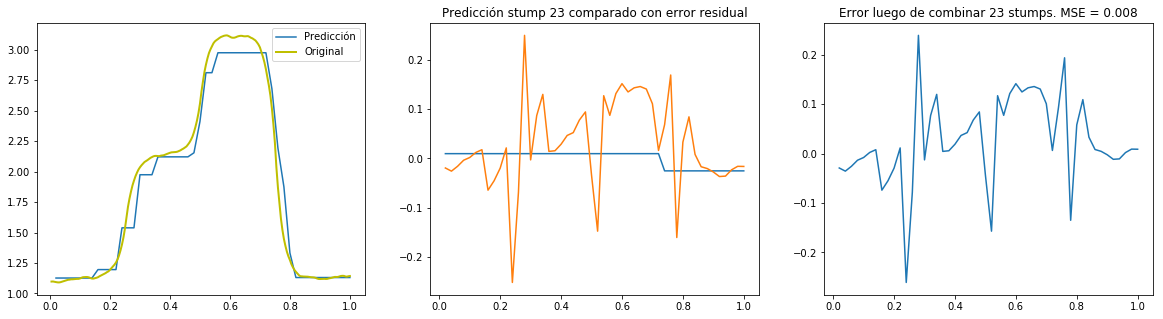

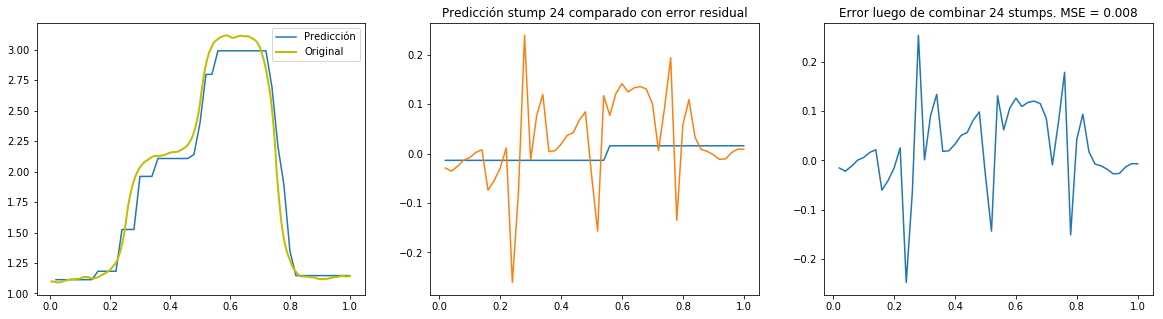

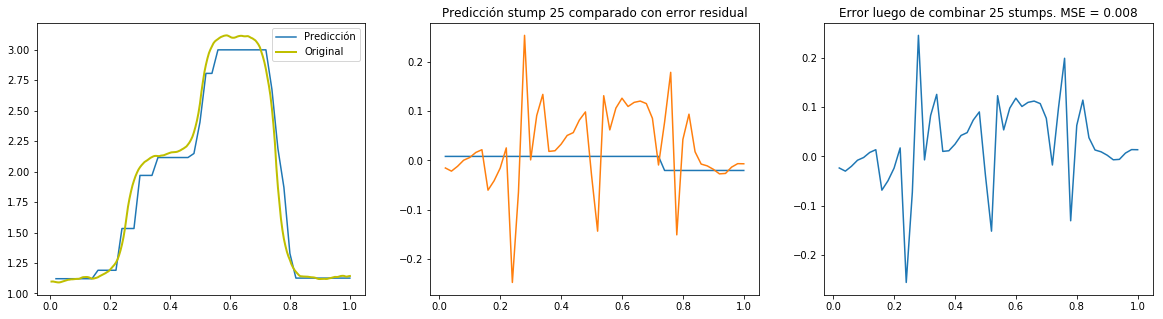

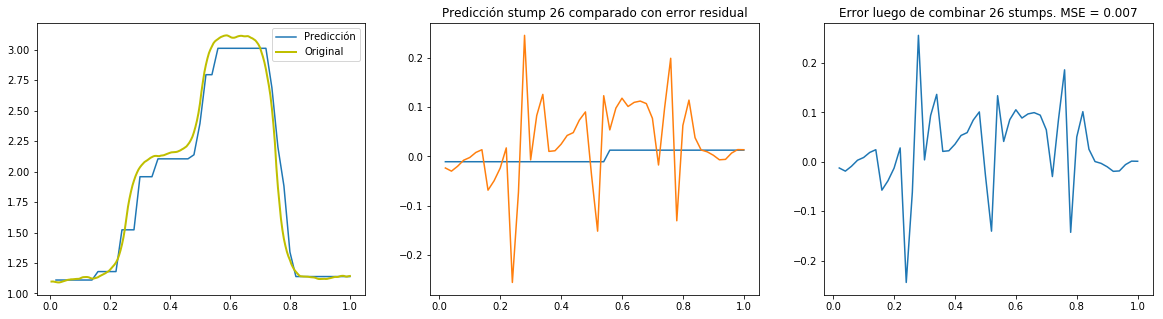

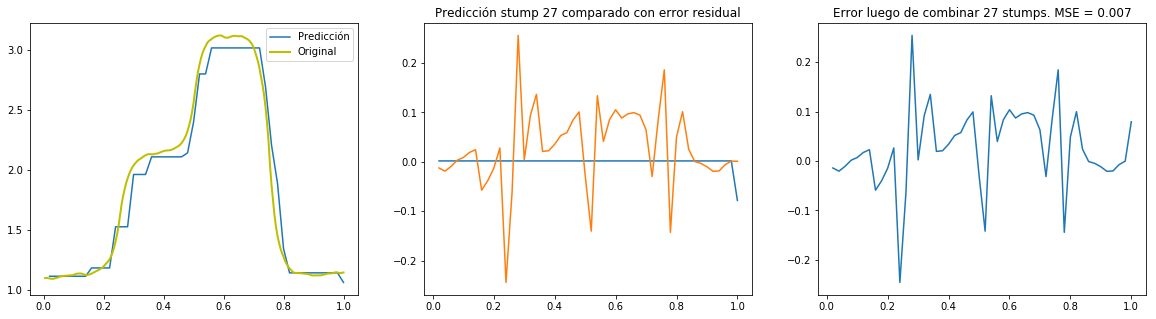

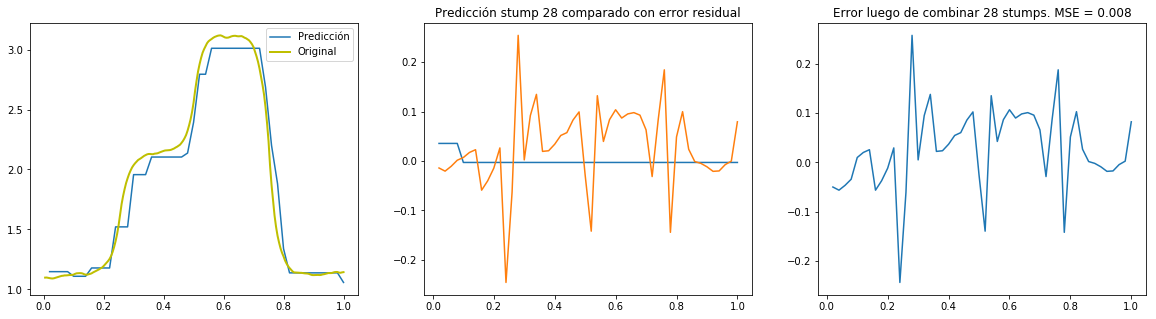

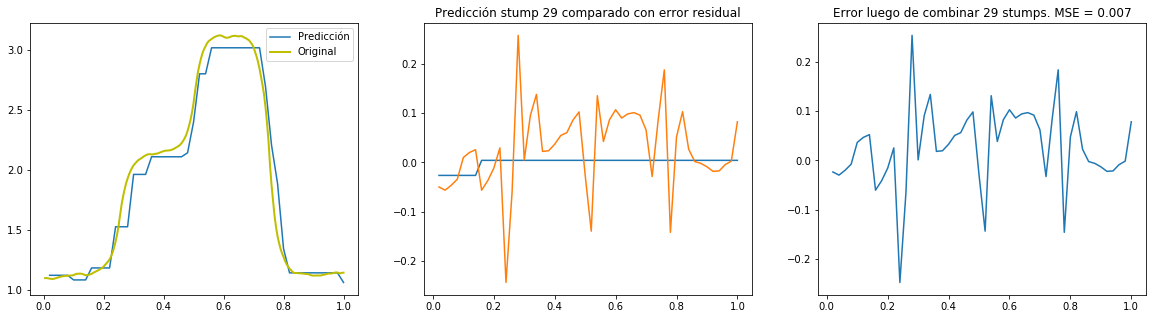

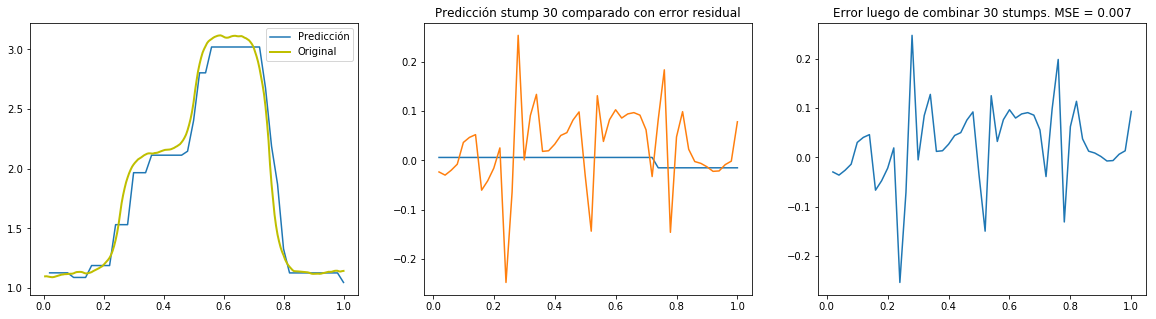

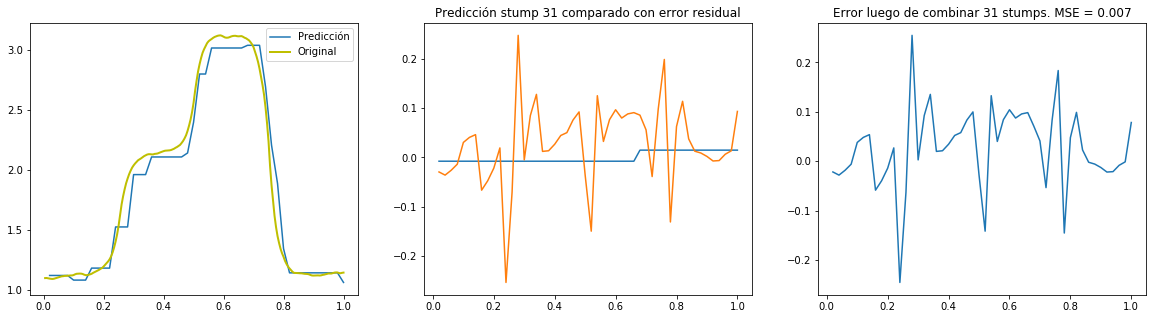

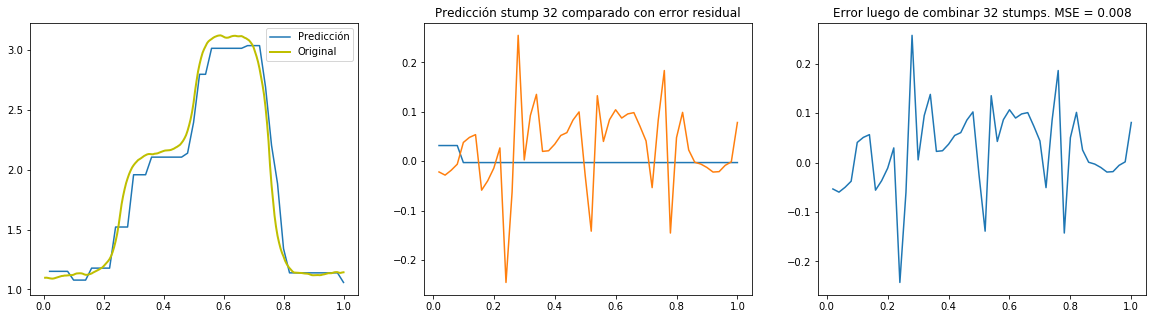

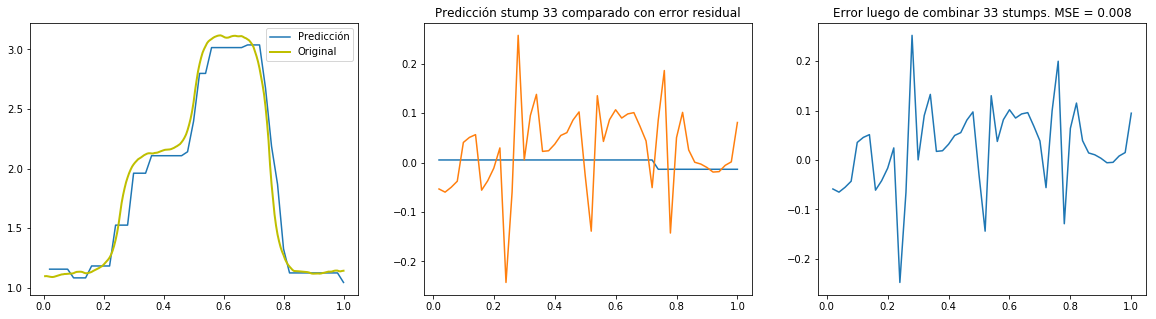

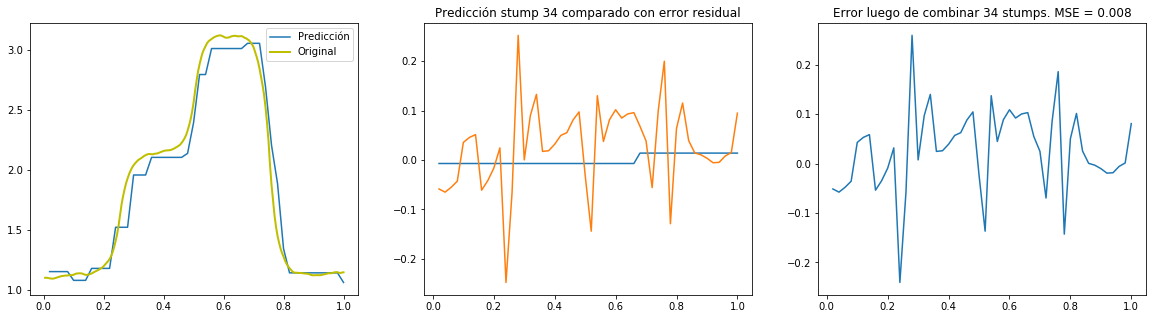

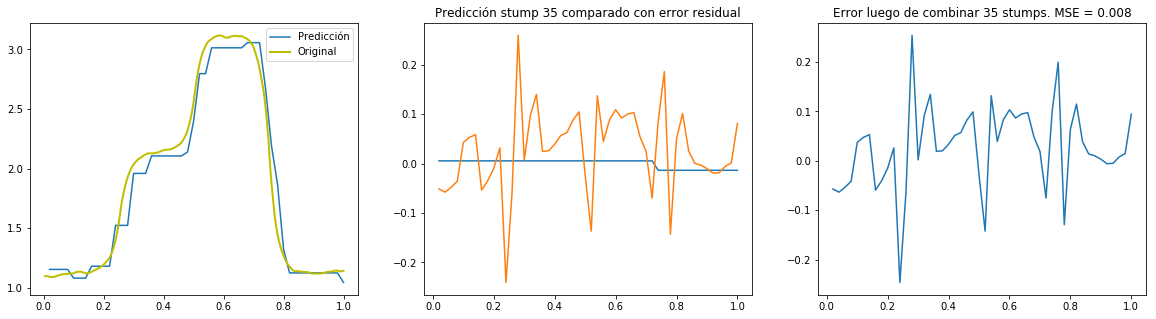

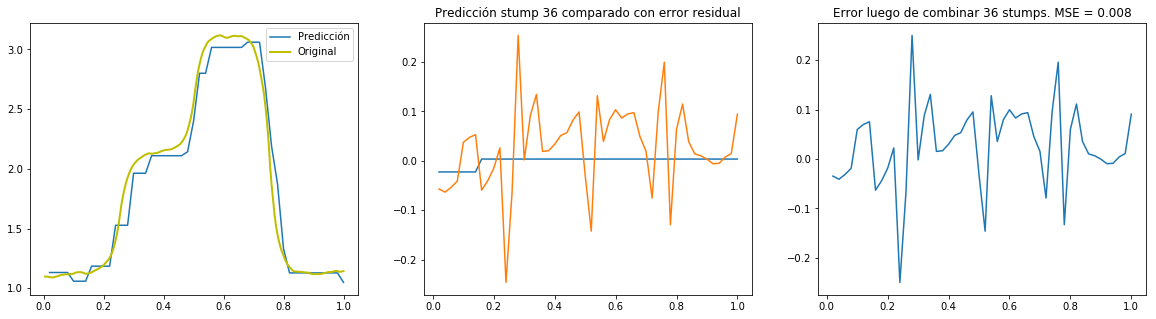

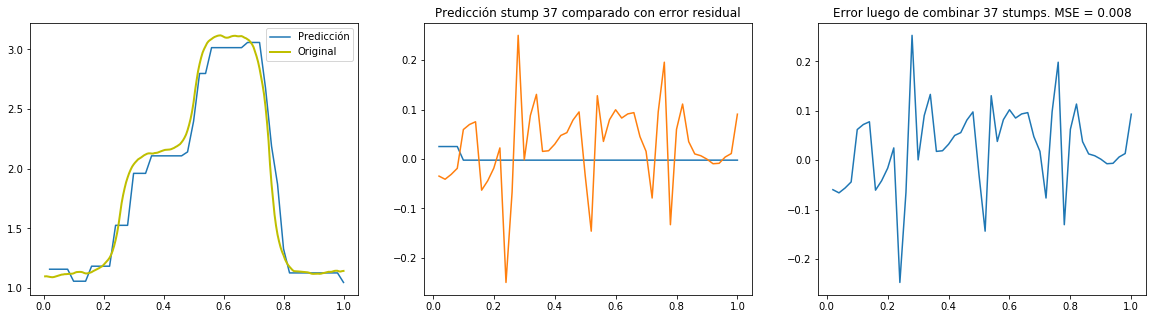

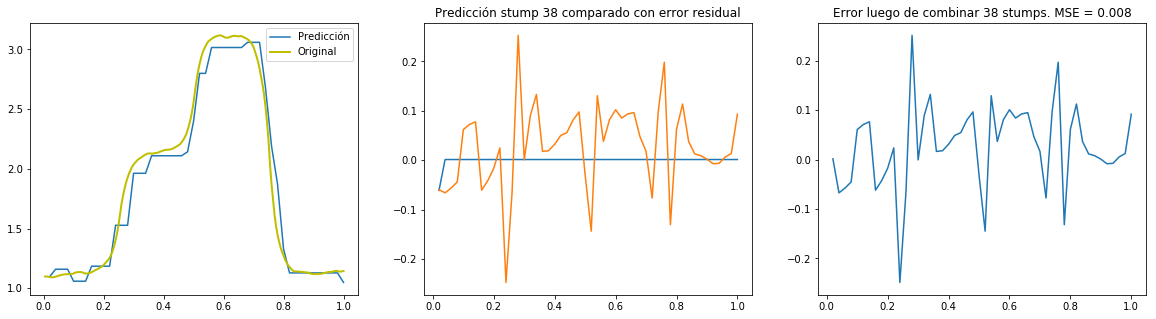

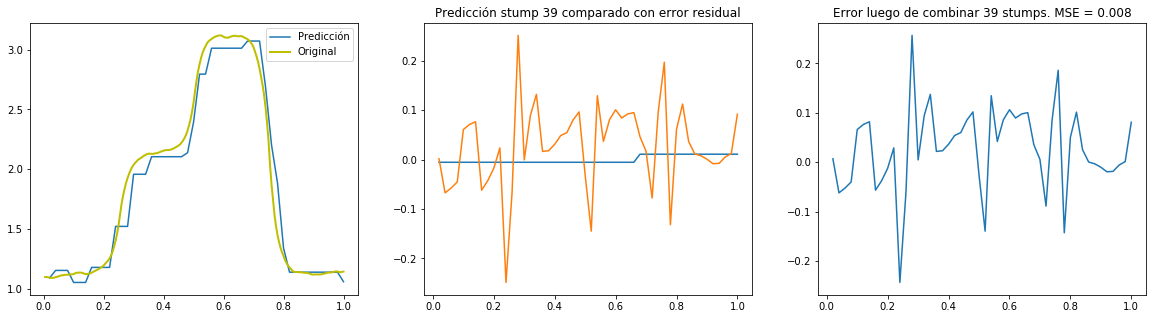

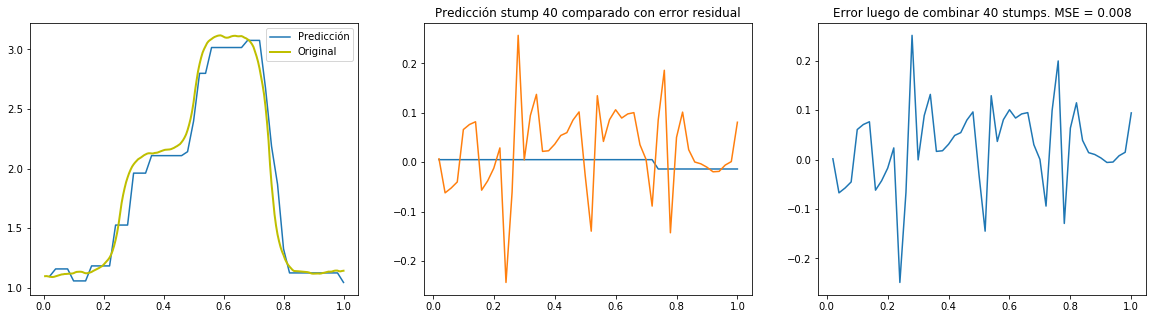

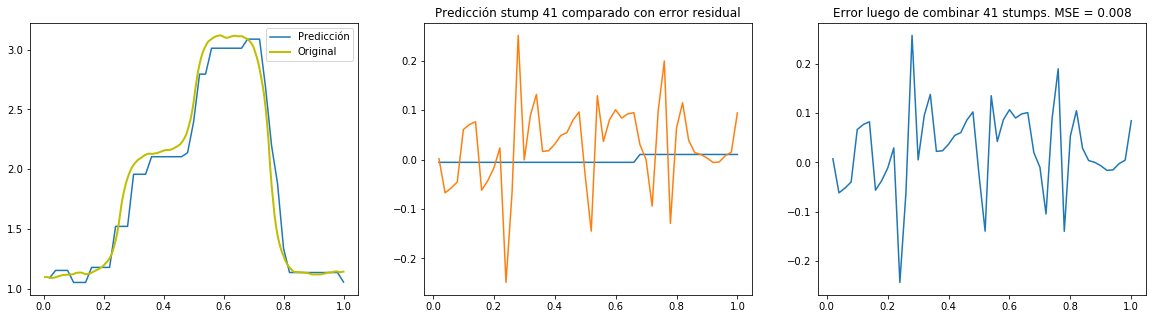

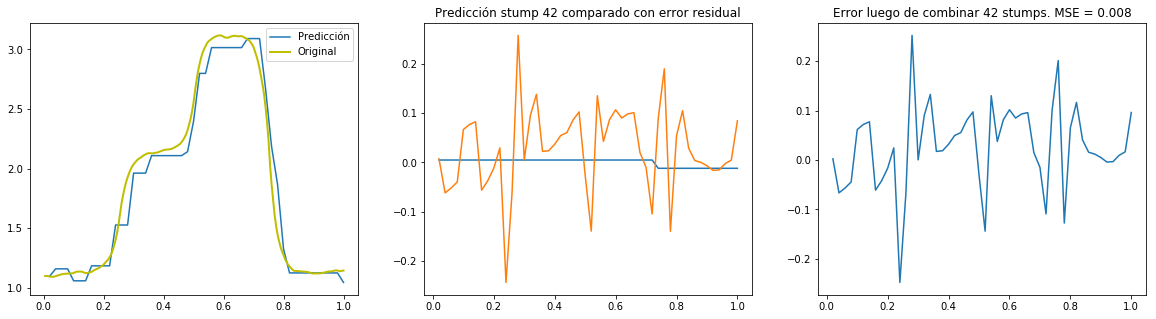

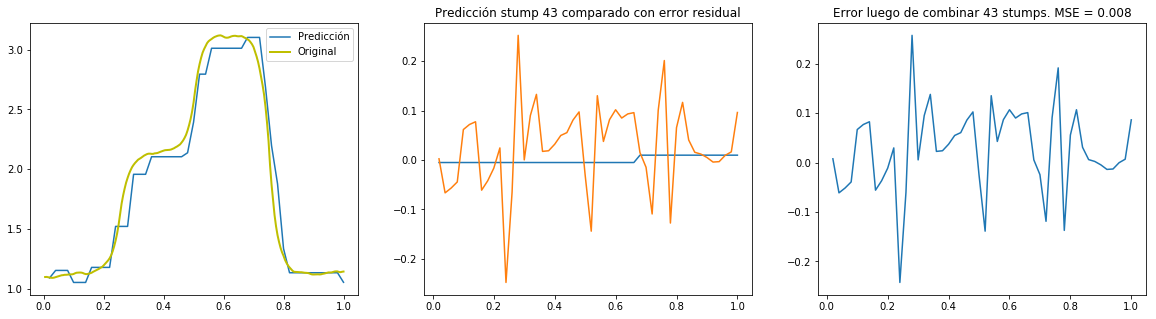

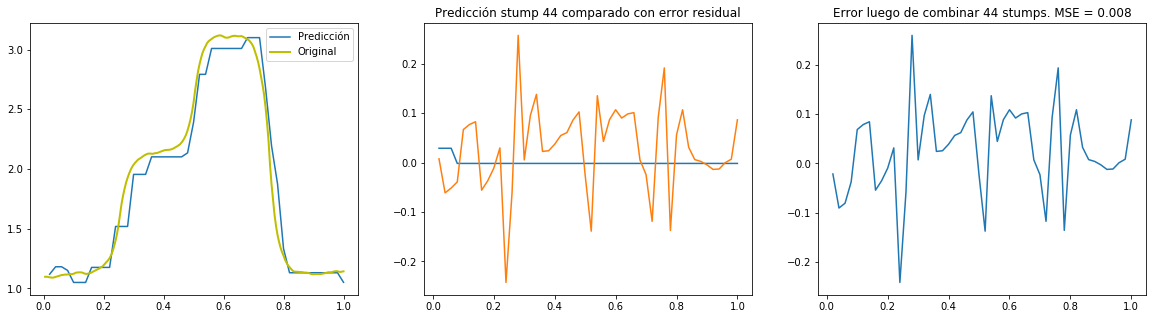

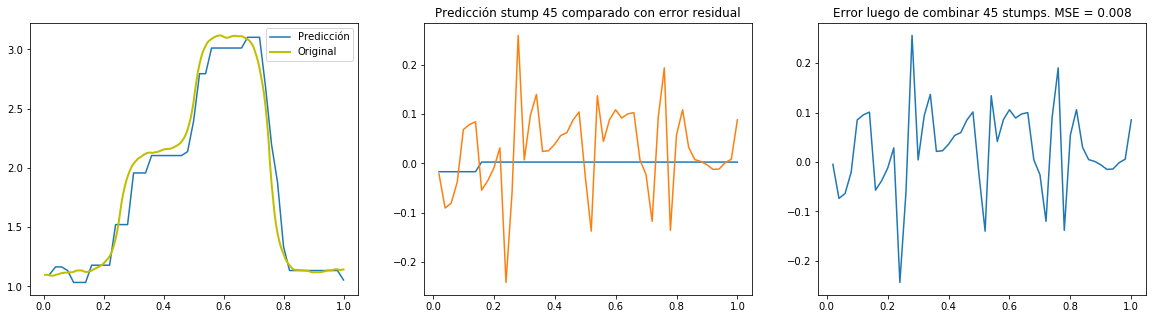

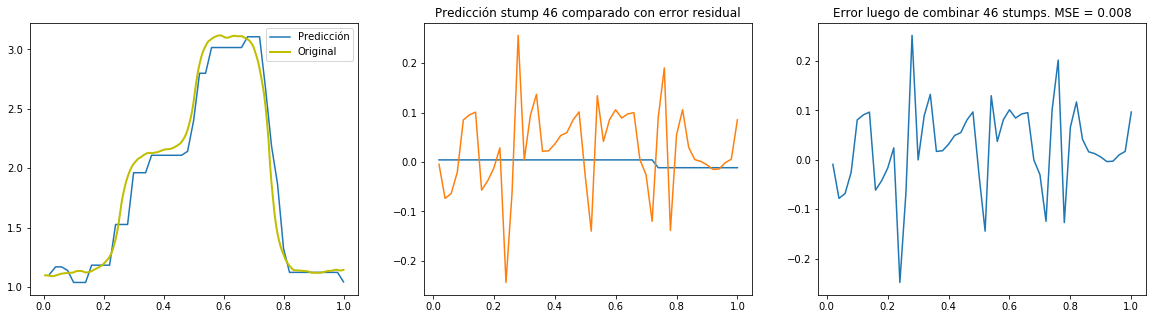

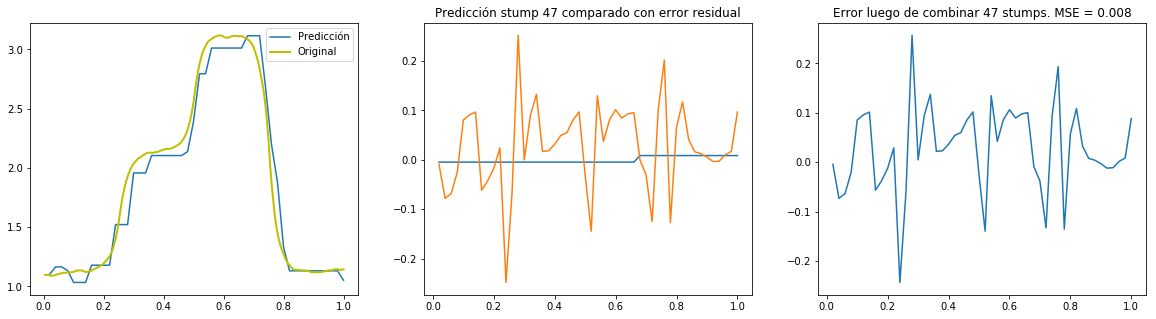

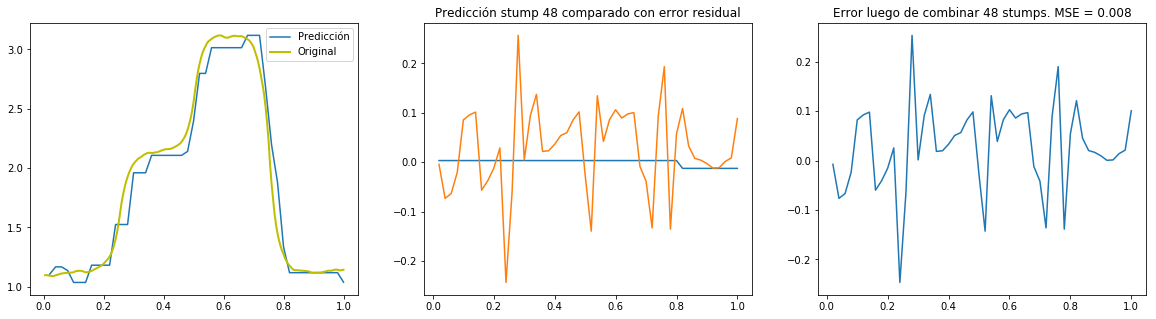

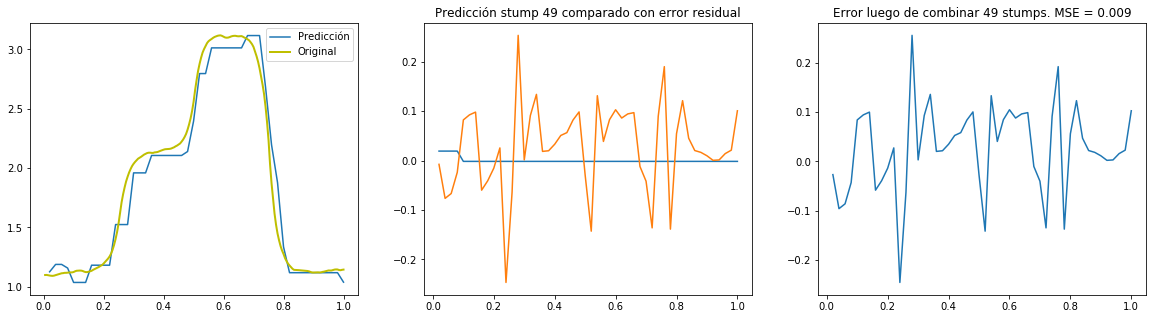

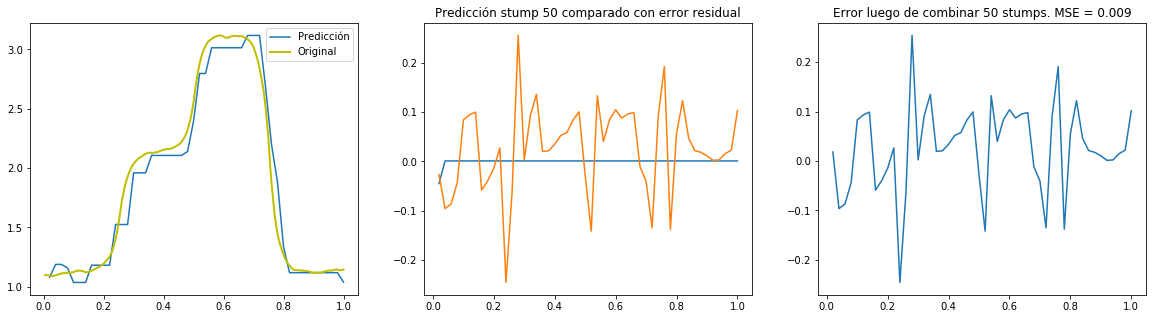

In [913]:
previous_pred = 0
previous_error = y_clean[::4]
for i, stage_pred in enumerate(boost_reg.staged_predict(X)):
    f, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].plot(X, stage_pred, label='Predicción')
    ax[0].plot(X_orig, y_clean, label='Original', c='y', lw=2)
    ax[0].legend()
    ax[1].plot(X, stage_pred - previous_pred)
    ax[1].plot(X, previous_error)
    ax[1].set_title(f'Predicción stump {i+1} comparado con error residual')
    error_func = y_clean[::4] - stage_pred
    previous_error = error_func
    MSE = np.mean(error_func**2)
    ax[2].plot(X, error_func)
    ax[2].set_title(f'Error luego de combinar {i+1} stumps. MSE = {MSE:.3f}')
    previous_pred = stage_pred
    # ax[1].set_ylim(0.9891666587715501, 3.219853818782454)
    plt.show()

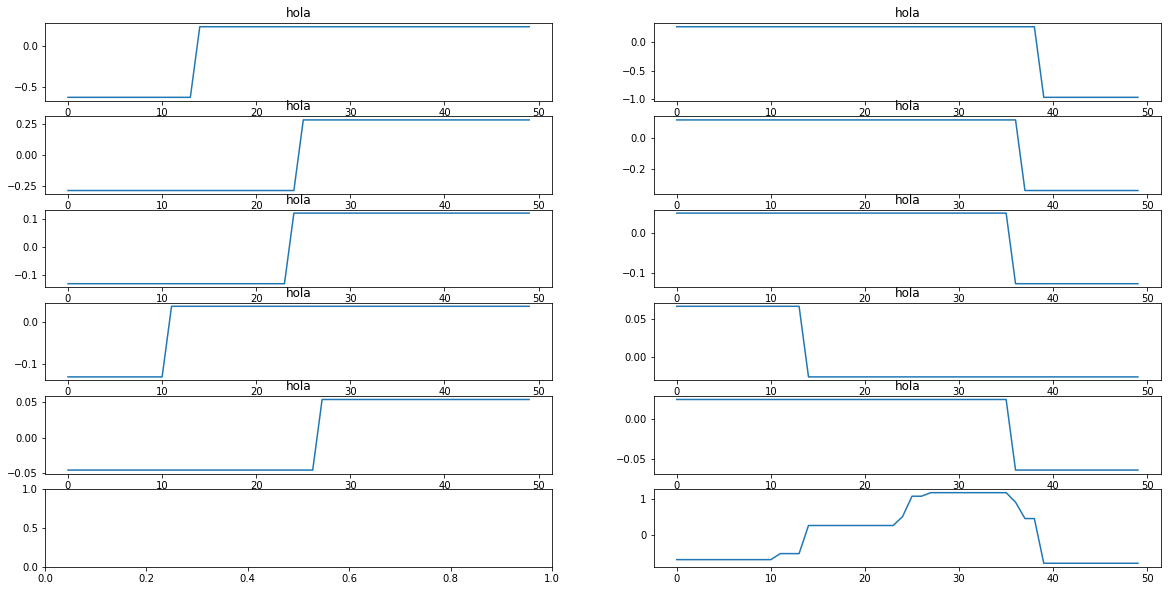

In [586]:
f, ax = plt.subplots(n_estimators//2 + 1, 2, figsize=(20,10))
ax = ax.reshape(-1)
suma = 0
for i, DT_predictor in enumerate(boost_reg.estimators_):
    prediction = DT_predictor[0].predict(X)
    ax[i].plot(prediction)
    suma = suma + prediction
    ax[i].set_title(f'hola')
ax[-1].plot(suma)

In [587]:
boost_reg.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x7fc6989b8090>,
                      splitter='best')], dtype=object)